# Table of Contents
 <p><div class="lev1"><a href="#Classes-Map"><span class="toc-item-num">1&nbsp;&nbsp;</span>Classes Map</a></div><div class="lev1"><a href="#Creating-Maps-for-Timelapses"><span class="toc-item-num">2&nbsp;&nbsp;</span>Creating Maps for Timelapses</a></div><div class="lev1"><a href="#Sensitivity-Maps"><span class="toc-item-num">3&nbsp;&nbsp;</span>Sensitivity Maps</a></div>

In [48]:
library(ggplot2)
library(maps)
library(mapdata)
library(readr)

options(jupyter.plot_mimetypes = 'image/png')

In [6]:
correction <- c("Antigua and Barbuda"="Antigua", "Bahamas, The"="Bahamas", "Brunei Darussalam"="Brunei", 
                "Cabo Verde"="Cape Verde", "Congo, Dem. Rep."="Democratic Republic of the Congo",
                "Congo, Rep."="Republic of Congo", "Cote d'Ivoire"="Ivory Coast", "Egypt, Arab Rep."="Egypt", 
                "Faeroe Islands"="Faroe Islands", "Gambia, The"="Gambia", "Iran, Islamic Rep."="Iran", 
                "Korea, Dem. Rep."="North Korea", "Korea, Rep."="South Korea", "Kyrgyz Republic"="Kyrgyzstan", "Lao PDR"="Laos", 
                "Macedonia, FYR"="Macedonia", "Micronesia, Fed. Sts."="Micronesia", "Russian Federation"="Russia", 
                "Slovak Republic"="Slovakia", "St. Lucia"="Saint Lucia", "St. Martin (French part)"="Saint Martin", 
                "St. Vincent and the Grenadines"="Saint Vincent", "Syrian Arab Republic"="Syria", 
                "Trinidad and Tobago"="Trinidad", "United Kingdom"="UK", "United States"="USA", 
                "Venezuela, RB"="Venezuela", "Virgin Islands (U.S.)"="Virgin Islands", "Yemen, Rep."="Yemen")

# Classes Map

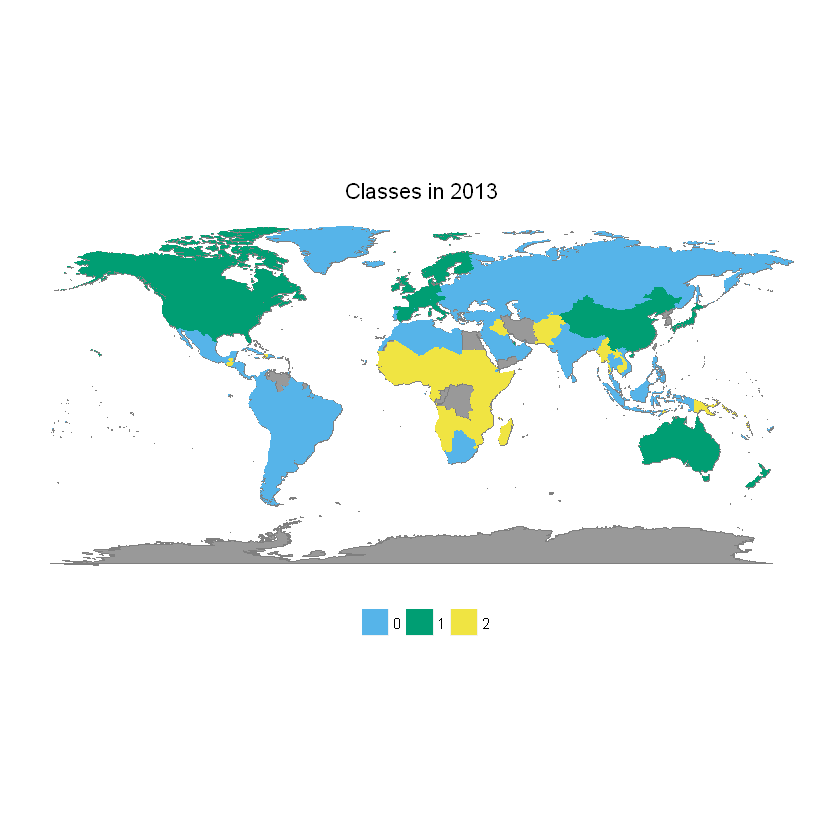

In [87]:
df <- read.csv('data/country_classes.csv')

df$Country <- as.character(df$Country)
df$Class <- as.factor(df$Class)

for (c in names((correction))) {
  df[df$Country == c, "Country"] = correction[c]
}

map.world <- merge(x=map_data(map="world"),
                   y=df[,c("Country","Class")],
                   by.x="region",
                   by.y="Country",
                   all.x=TRUE)
map.world <- map.world[order(map.world$order),]

cbPalette <- c("#56B4E9", "#009E73", "#F0E442", "#0072B2", "#D55E00", "#CC79A7")

p <- ggplot(map.world) +
    geom_map(map=map.world, aes(map_id=region, x=long, y=lat), fill="#999999", color="#7f7f7f", size=0.25) +
    geom_map(map=map.world, aes(map_id=region, x=long, y=lat, fill=Class)) + 
    scale_fill_manual(values=cbPalette) + 
    coord_equal() +
    theme(axis.line=element_blank(),
          axis.text.x=element_blank(),
          axis.text.y=element_blank(),
          axis.ticks=element_blank(),
          axis.title.x=element_blank(),
          axis.title.y=element_blank(),
          panel.background=element_blank(),
          panel.border=element_blank(),
          panel.grid.major=element_blank(),
          panel.grid.minor=element_blank(),
          plot.background=element_blank(),
          legend.title=element_blank(),
          legend.position="bottom") +
    ggtitle("Classes in 2013")
ggsave(paste("maps/country_classes.png"), p, width=7, height=4, units="in")
p

# Creating Maps for Timelapses

In [85]:
plotHeatMap <- function(filename, year, title) {
  df <- read.csv( paste("data/", filename, ".csv", sep="") )
  df$Country <- as.character(df$Country)  
  for (c in names((correction))) {
    df[df$Country == c, "Country"] = correction[c]
  }  
  map.world <- merge(x=map_data(map="world"),
                     y=df[,c("Country","Value")],
                     by.x="region",
                     by.y="Country",
                     all.x=TRUE)
  map.world <- map.world[order(map.world$order),]  
  p <- ggplot(map.world) +
    geom_map(map=map.world, aes(map_id=region, x=long, y=lat, fill=Value)) + 
    scale_fill_gradient(low = "brown3", high = "green", guide = "colourbar") +
    coord_equal() +
    theme(axis.line=element_blank(),
          axis.text.x=element_blank(),
          axis.text.y=element_blank(),
          axis.ticks=element_blank(),
          axis.title.x=element_blank(),
          axis.title.y=element_blank(),
          panel.background=element_blank(),
          panel.border=element_blank(),
          panel.grid.major=element_blank(),
          panel.grid.minor=element_blank(),
          plot.background=element_blank(),
          legend.title=element_blank(),
          legend.position="bottom") +
    ggtitle(paste(title, year, sep=" -- "))  
  ggsave(paste("maps/", filename, ".png", sep=""), p, width=7, height=4, units="in")
}

In [74]:
for (year in 2005:2014) {
    plotHeatMap( paste("parliament_", year, sep=""), year, "Proportion of Seats Held by Women in National Parliaments" )
}

In [75]:
for (year in 2005:2014) {
    plotHeatMap( paste("gov_effectiveness_", year, sep=""), year, "Government Effectiveness" )
}

In [77]:
for (year in 2005:2014) {
    plotHeatMap( paste("gov_corruption_", year, sep=""), year, "Control of Corruption")
}

# Sensitivity Maps

In [84]:
plotHeatMap( "global_GE_sensitivity", 2013, "Government Effectiveness Sensitivity to Women in Parliament (Global)" )
plotHeatMap( "class0_GE_sensitivity", 2013, "Government Effectiveness Sensitivity to Women in Parliament (Class 0)" )
plotHeatMap( "class1_GE_sensitivity", 2013, "Government Effectiveness Sensitivity to Women in Parliament (Class 1)" )
plotHeatMap( "class2_GE_sensitivity", 2013, "Government Effectiveness Sensitivity to Women in Parliament (Class 2)" )